In [1]:

import pandas as pd

import numpy as np
import numpy
from sklearn.mixture import GaussianMixture

from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import plotly.graph_objects as go

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
import matplotlib.cm as cm


In [7]:

# file name = binned_SFHs-7levels-JWST_z_0.5-1.0
file = "binned_SFHs-7levels-JWST_z_0.5-1.0.txt"
df = pd.read_csv(file,sep='\t')
df
levels=df.columns[2:8]
SFH_lev=df[levels].values


X_train = SFH_lev
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
sz = X_train.shape[1]
print(X_train.shape)

# Reshape X_train to 2 dimensions
nSamples, nx, ny = X_train.shape
X_train = X_train.reshape((nSamples, nx*ny))


(91370, 6, 1)


In [3]:
# GMM clustering
seed = 0
print("GMM clustering")
gmm = GaussianMixture(verbose=1, n_components=6, covariance_type="tied")
gmm.fit(X_train)
y_pred = gmm.predict(X_train)
print("train done")



GMM clustering
Initialization 0
  Iteration 10
Initialization converged: True
train done


[0 1 2 3 4 5]
[14532  3638  8785 18069 35635 10711]


(array([1., 1., 1., 1., 1., 0., 0., 0., 0., 1.]),
 array([ 3638. ,  6837.7, 10037.4, 13237.1, 16436.8, 19636.5, 22836.2,
        26035.9, 29235.6, 32435.3, 35635. ]),
 <BarContainer object of 10 artists>)

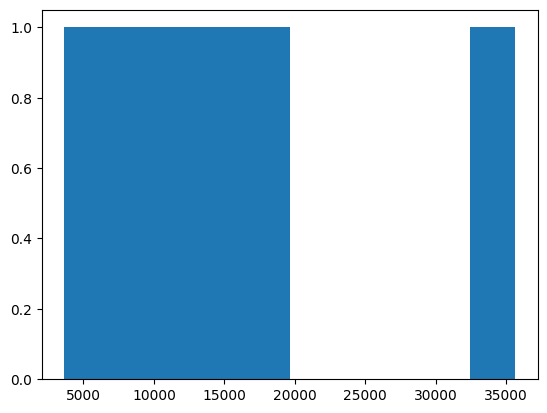

In [4]:

unique_labels = np.unique(y_pred)
counts = np.bincount(y_pred)

print(unique_labels)
print(counts)
plt.hist(counts)

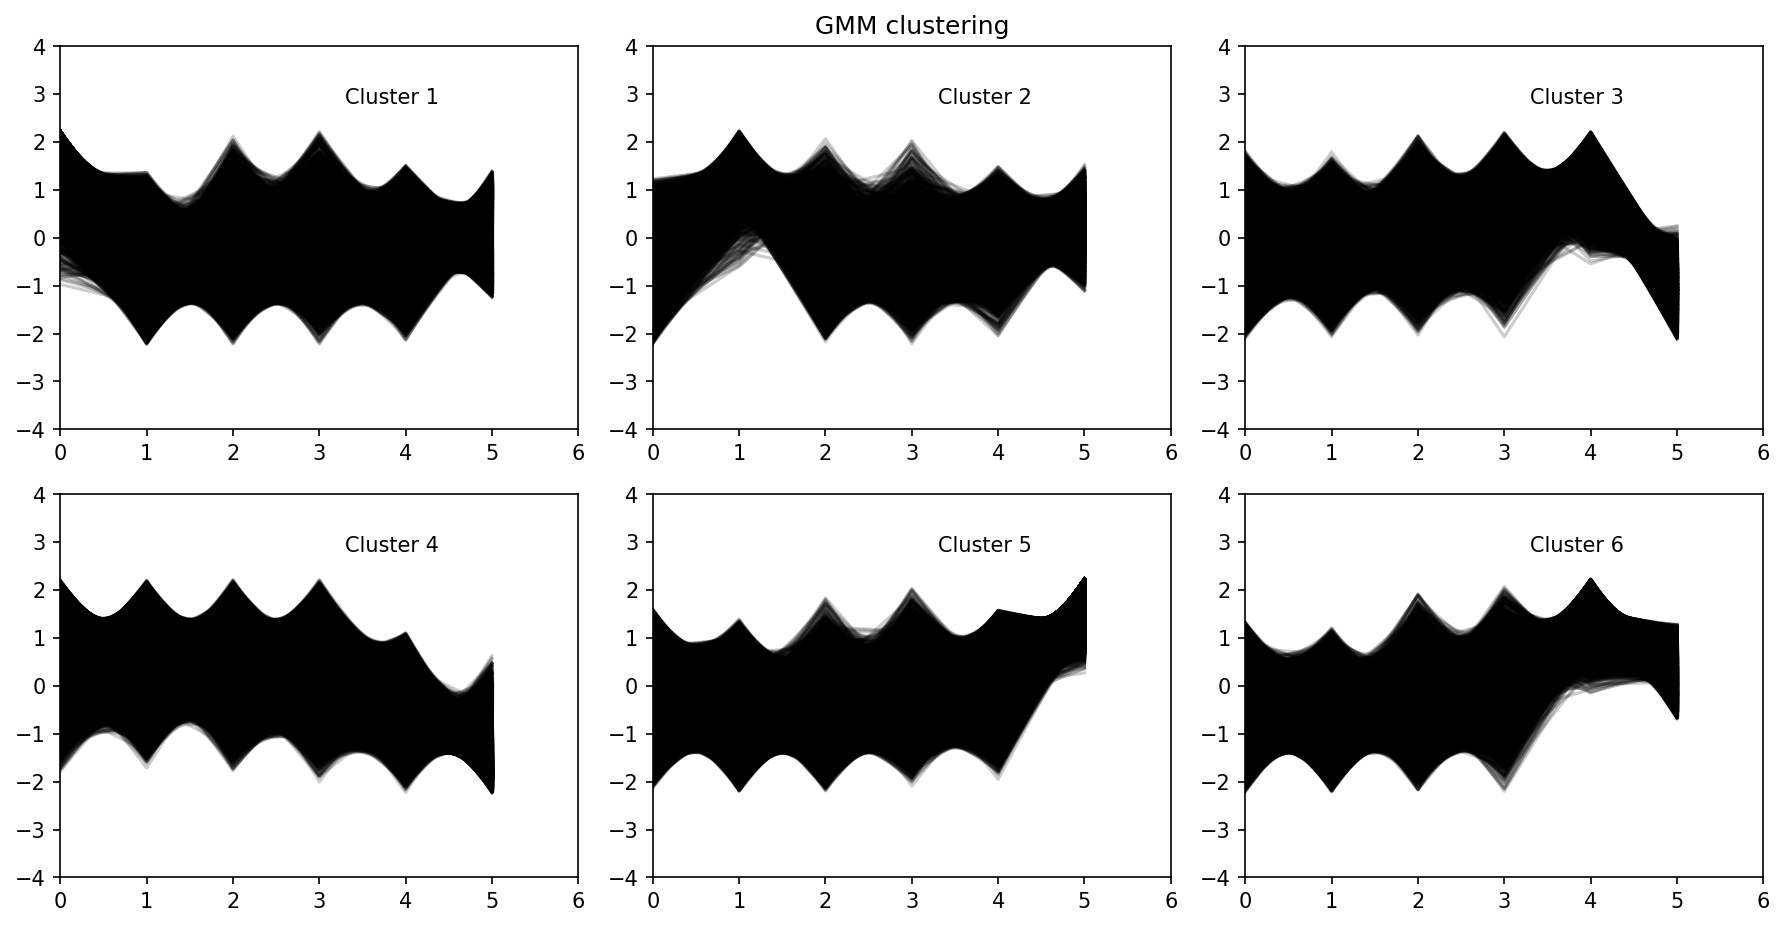

In [8]:
plt.figure(figsize=(12, 18), dpi=150)  # Increase the figure size and dpi

for yi in range(6):
    plt.subplot(6, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85, 'Cluster %d' % (yi + 1), transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("GMM clustering")

plt.tight_layout()
plt.show()


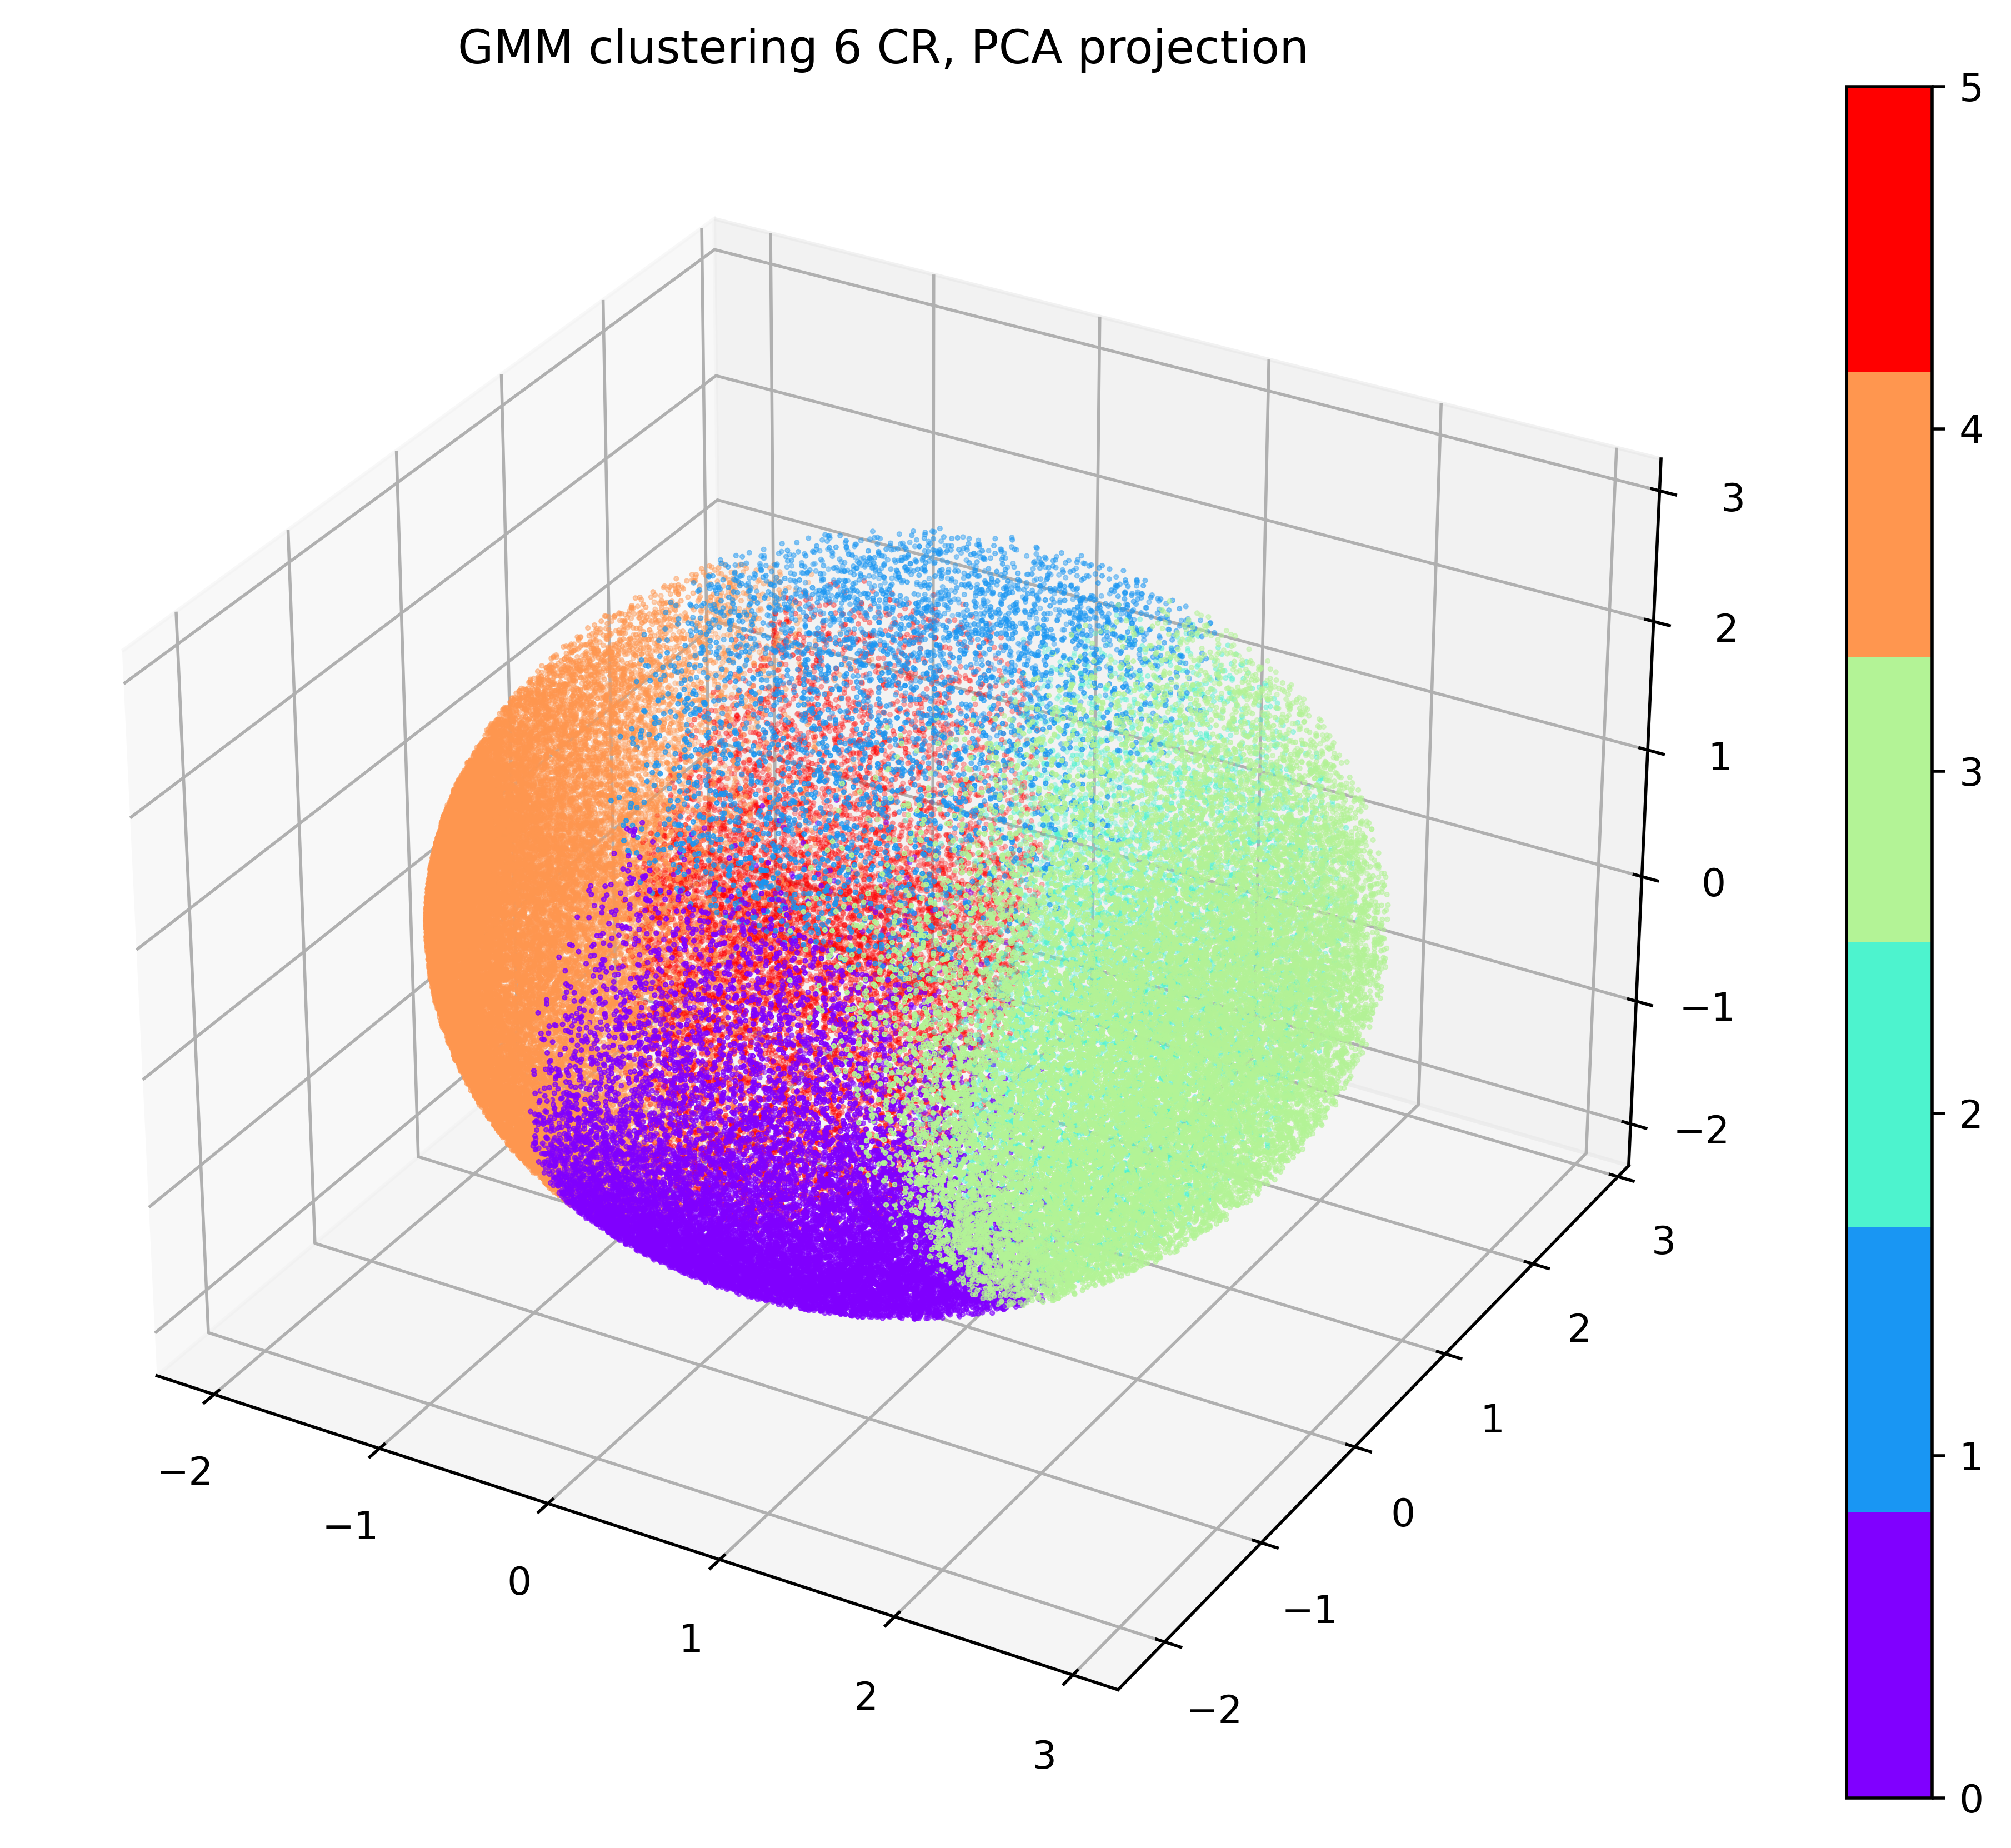

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.cm as cm

# Project to 3D for plotting
pca = PCA(n_components=3)
X_train_3d = pca.fit_transform(X_train)

unique_labels = np.unique(y_pred)
num_labels = len(unique_labels)
colors = cm.rainbow(np.linspace(0, 1, num_labels))
cmap = ListedColormap(colors)

# Increase the resolution
fig = plt.figure(figsize=(10, 8), dpi=500)
ax = fig.add_subplot(111, projection='3d')

# Plot data
scatter = ax.scatter(X_train_3d[:, 0], X_train_3d[:, 1], X_train_3d[:, 2], c=y_pred, cmap=cmap, s=0.2)

# Set plot title
ax.set_title('GMM clustering 6 CR, PCA projection')

# Add colorbar
cbar = fig.colorbar(scatter)

# Display the plot
plt.show()
